# 2-1 Social Networks in Texts

Before you begin work in this lab, you will need to add the following modules to your Python library:

- `networkx`
- `lxml`

In [34]:
# IMPORTS
import lxml.etree
import networkx as nx
import matplotlib.pyplot as plt

# Set plt parameters
plt.rcParams['figure.dpi'] = 300
plt.rcParams["figure.figsize"] = (10,5)

In [41]:
# Let's not repeat ourselves
the_file = "../data/hamlet.tei"

## Toy Network

In [3]:
# List of nodes (or vertices)
V = [1, 2, 3, 4, 5]

# List of edges (or links) between nodes as node pairs
E = [(1,2), (1,4), (2,5), (3,4), (4,5)]

In [7]:
G = nx.Graph()
G.add_nodes_from(V)
G.add_edges_from(E)

(-0.936445878619668,
 1.1840061694615973,
 -0.5702944119009951,
 0.4653341640062463)

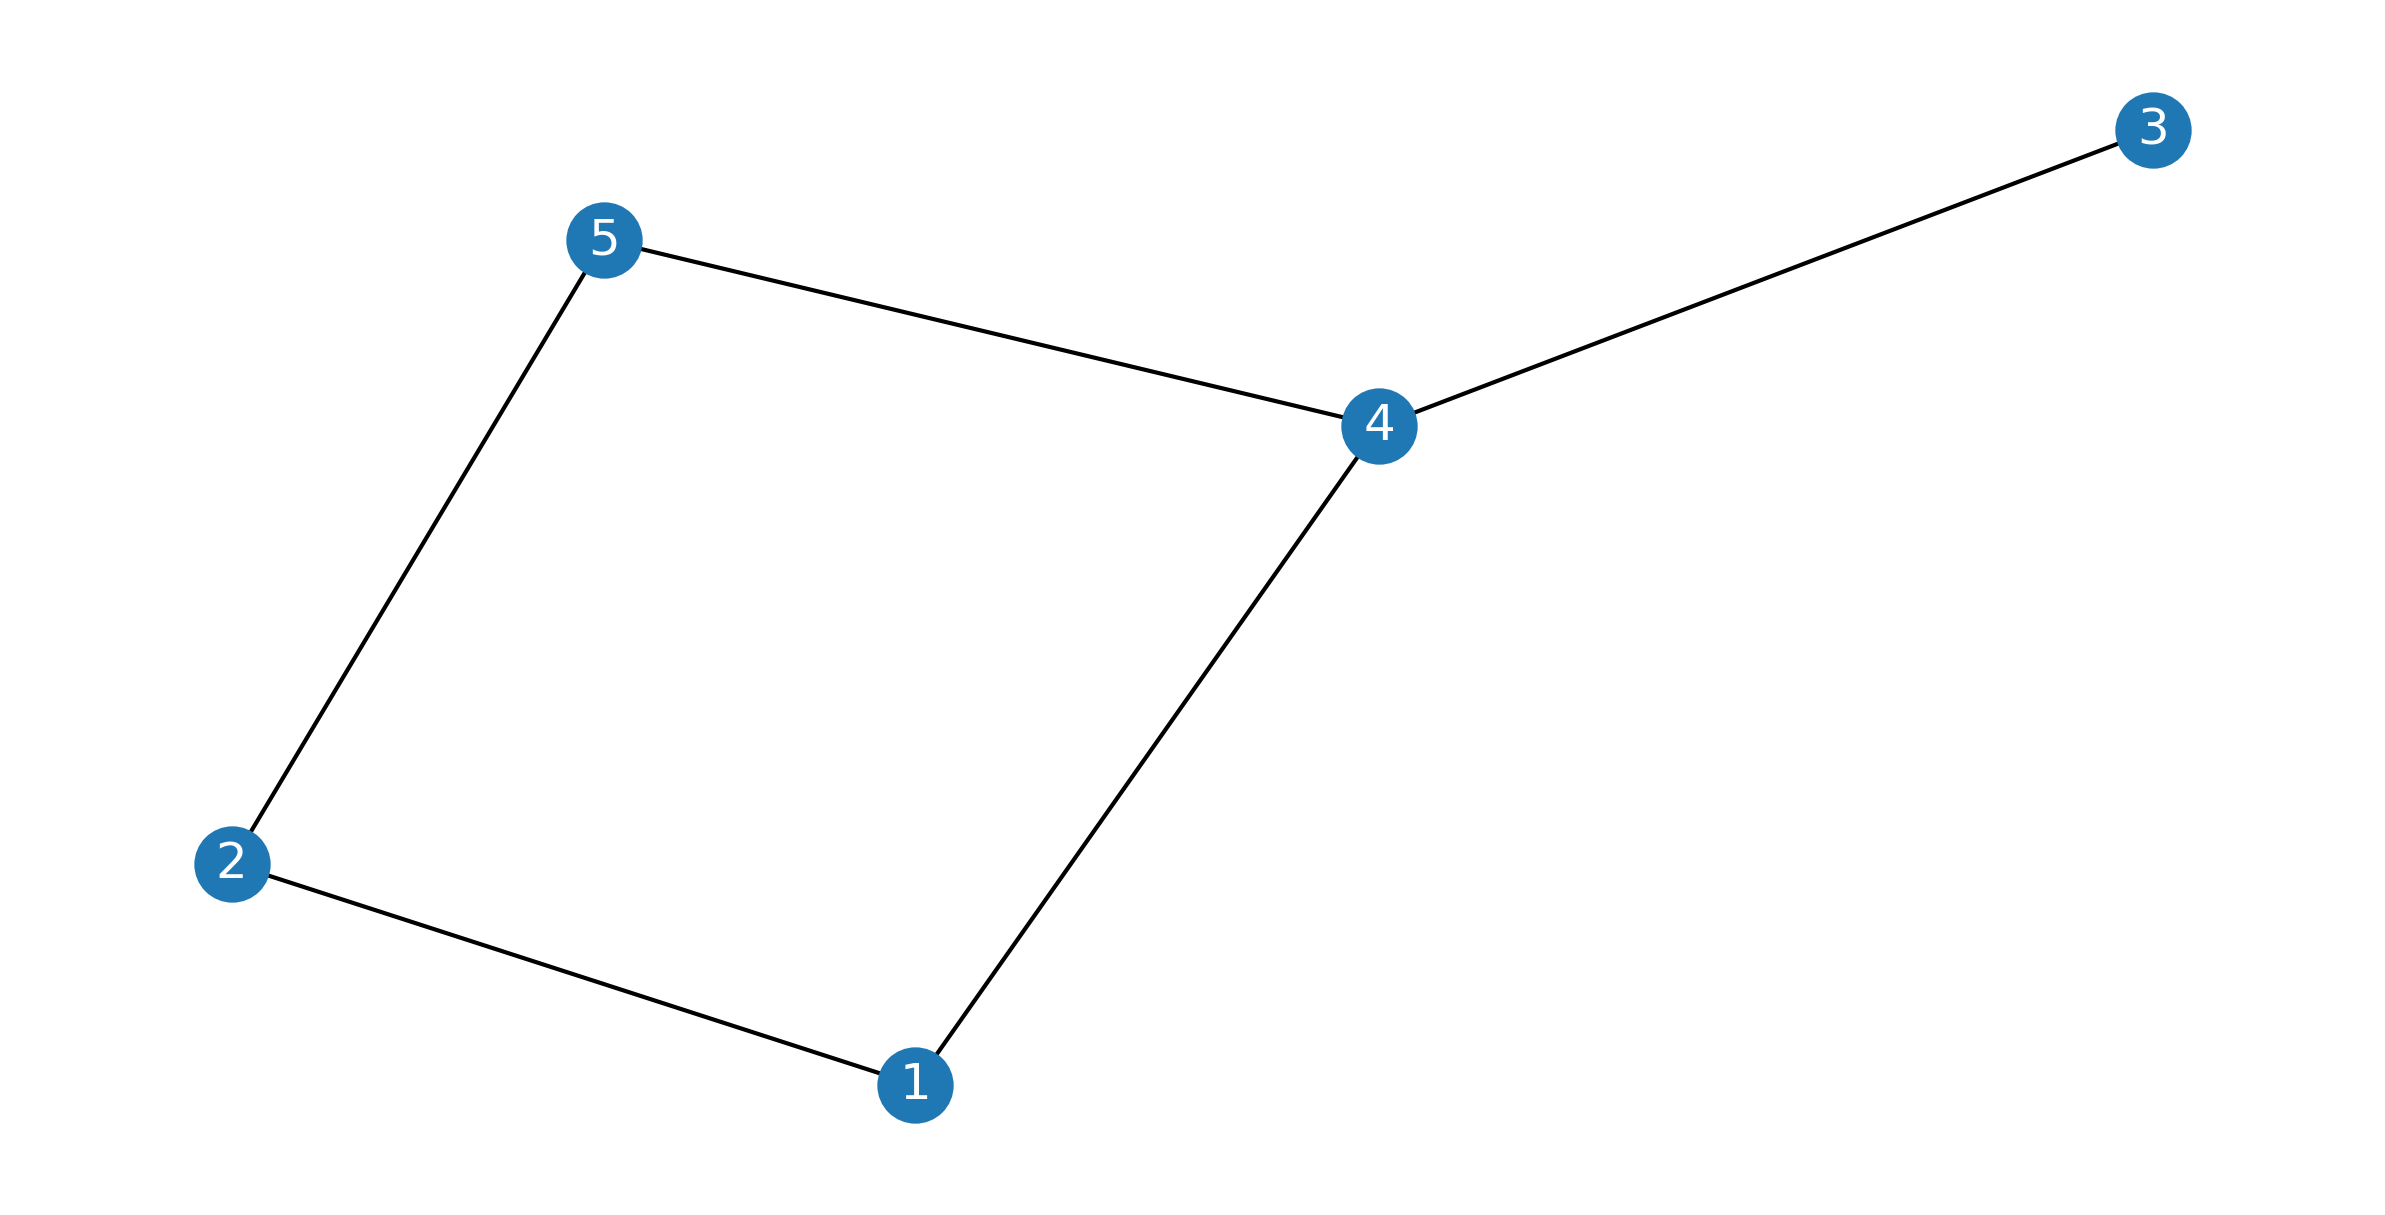

In [11]:
nx.draw_networkx(G, font_color="white")
plt.axis("off")

## Working with Structured Data

### Seeing the File for Yourself

In [30]:
with open(the_file) as f:
    macbeth = f.read()

print(macbeth[0:200])

<?xml-stylesheet type="text/xsl" href="fdt.xsl"?>
<TEI xmlns="http://www.tei-c.org/ns/1.0">
<teiHeader>
<fileDesc>
<titleStmt>
<title>Macbeth</title>
<author>William Shakespeare</author>
<editor xml:i


In [31]:
print(macbeth[33029:33909])


<sp xml:id="sp-0001" who="#WITCHES.1_Mac">
<speaker xml:id="spk-0001">
<w xml:id="w0000200">FIRST</w>
<c xml:id="c0000210"> </c>
<w xml:id="w0000220">WITCH</w>
</speaker>
<ab xml:id="ab-0001">
<lb xml:id="lb-00005"/>
<milestone unit="ftln" xml:id="ftln-0001" n="1.1.1" ana="#verse" corresp="#w0000230 #c0000240 #w0000250 #c0000260 #w0000270 #c0000280 #w0000290 #c0000300 #w0000310 #c0000320 #w0000330 #p0000340"/>
<w xml:id="w0000230" n="1.1.1">When</w>
<c xml:id="c0000240" n="1.1.1"> </c>
<w xml:id="w0000250" n="1.1.1">shall</w>
<c xml:id="c0000260" n="1.1.1"> </c>
<w xml:id="w0000270" n="1.1.1">we</w>
<c xml:id="c0000280" n="1.1.1"> </c>
<w xml:id="w0000290" n="1.1.1">three</w>
<c xml:id="c0000300" n="1.1.1"> </c>
<w xml:id="w0000310" n="1.1.1">meet</w>
<c xml:id="c0000320" n="1.1.1"> </c>
<w xml:id="w0000330" n="1.1.1">again</w>
<pc xml:id="p0000340" n="1.1.1">?</pc>



In [46]:
NSMAP = {'tei':'https://tei-c.org/ns/1.0'}

def character_network(tree):
    """Construct a Character Interaction Network
    Nodes are sized on successive speaker turns
    Edges are based on when one speaker follows another
    INPUT: tree - an lxml.ElementTree 
    OUTPUT: a weighted, undirected NetworkX Graph
    """
    # Extract a list of speaker turns for each scene in a play
    for scene in tree.iterfind('.//tei.div2[@type="scene"]', NSMAP):
        speakers = scene.findall('.//tei:sp', NSMAP)
        
        # Iterate over the sequence of speaker turns
        for i in range(len(speakers) - 1):
            try:
                # Extract speaker pair
                speaker_i = speakers[i].attrib['who'].split('_')[0].replace('#','')
                speaker_j = speakers[i + 1].attrib['who'].split('_')[0].replace('#','')
                # If pair already extant, update their interaction count
                if G.has_edge(speaker_i, speaker_j):
                    G[speaker_i][speaker_j]['weight'] += 1
                # Else add the pair
                else:
                    G.add_edge(speaker_i, speaker_j, weight = 1)
            except KeyError:
                continue
    return G

In [47]:
# Load the file as an xml file
tree = lxml.etree.parse(the_file)

# Use our function to extract our CIN
G = character_network(tree.getroot())

# Get some sense of the results
print(f"N nodes = {G.number_of_nodes()}, N edges = {G.number_of_edges()}")

N nodes = 5, N edges = 5


In [48]:
import collections

interactions = collections.Counter()

for speaker_1, speaker_j, data in G.edges(data=True):
    interaction_count = data['weight']
    interactions[speaker_i] += interaction_count
    interactions[speaker_j] += interaction_count

nodesizes = [interactions[speaker] * 5 for speaker in G]

KeyError: 'weight'